In [3]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.head())
print(df.info())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Text(0.5, 1.0, 'Attrition by Department')

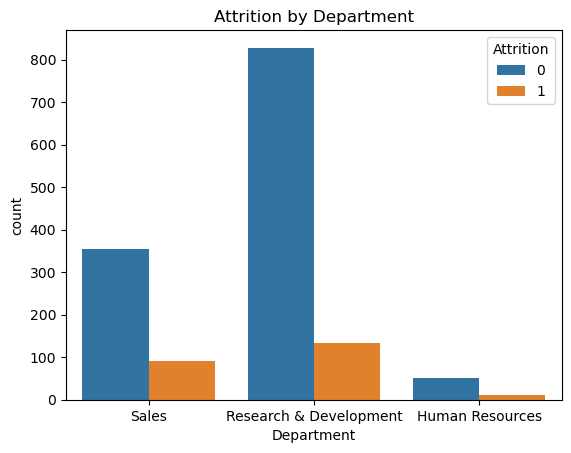

In [6]:
print(df.isnull().sum())

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[254   1]
 [ 36   3]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



In [9]:
!pip install shap

SHAP values type: <class 'numpy.ndarray'>
Length: 294
SHAP[1] shape: (30, 2)
X_test shape: (294, 30)


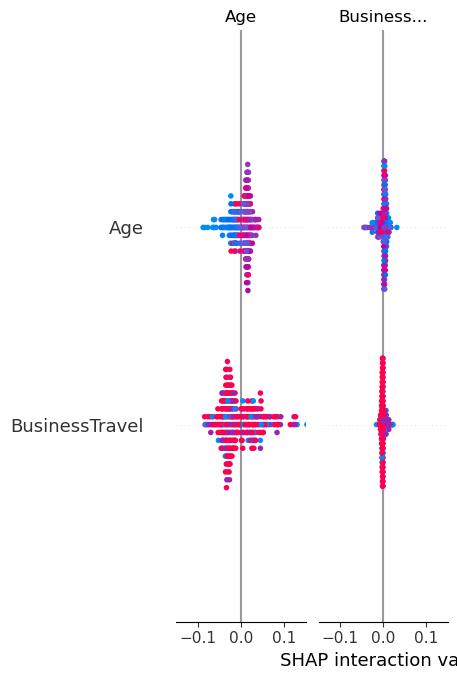

In [15]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

print("SHAP values type:", type(shap_values))
print("Length:", len(shap_values))
print("SHAP[1] shape:", shap_values[1].shape)
print("X_test shape:", X_test_df.shape)

if isinstance(shap_values, list) and shap_values[1].shape == X_test_df.shape:
    shap.summary_plot(shap_values[1], X_test_df)
elif isinstance(shap_values, list):
    shap.summary_plot(shap_values[1][:, :-1], X_test_df)
else:
    shap.summary_plot(shap_values, X_test_df)

In [17]:
df.to_csv("cleaned_hr_data.csv", index=False)